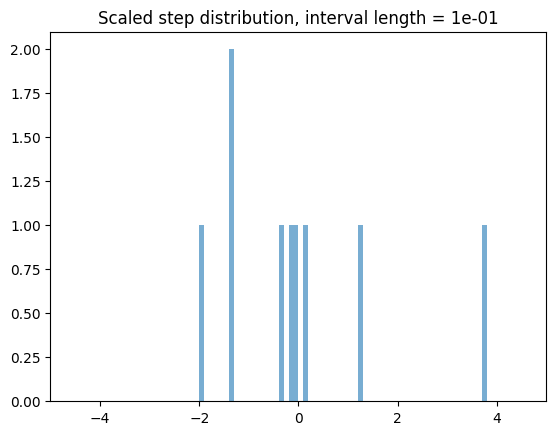

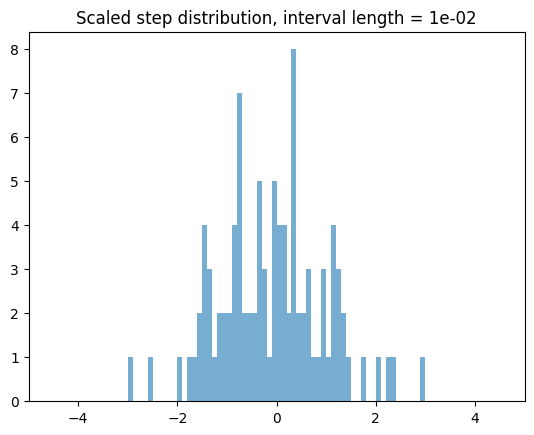

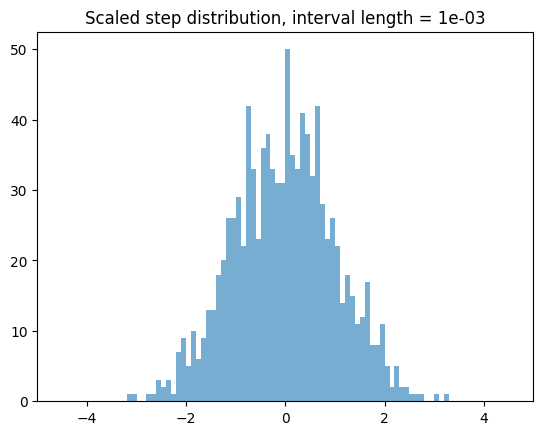

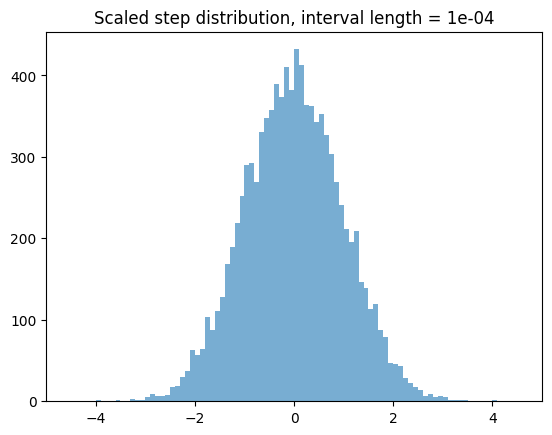

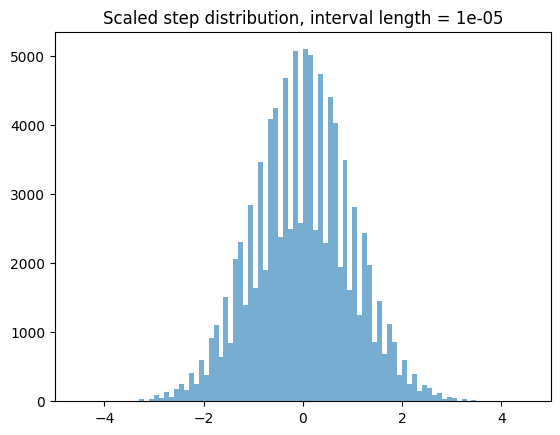

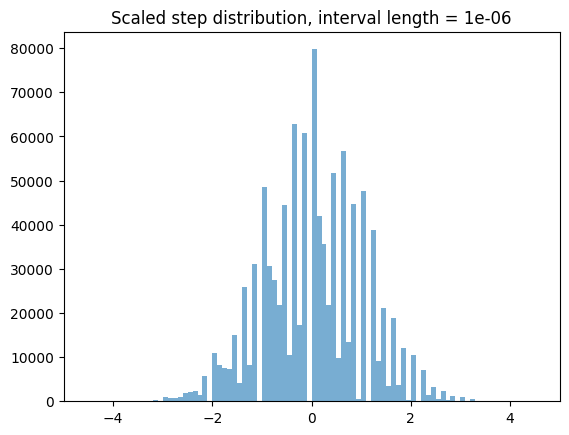

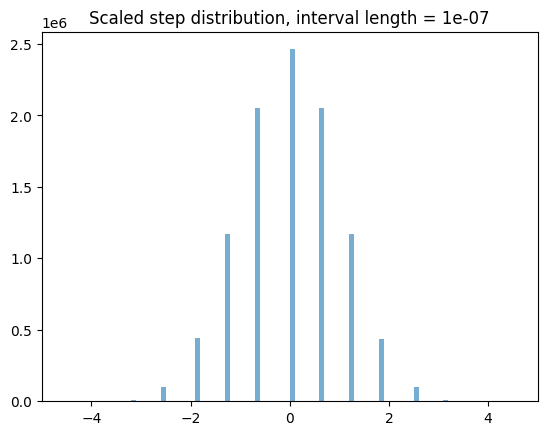

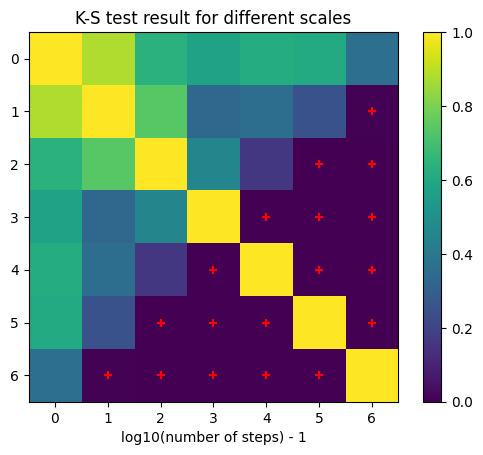

In [4]:
# heatmap for different scales
from scipy.stats import ks_2samp
def heatmap():
    n_scales = 7 # n_scales = k means we split into 10^(k+1) intervals
    samples = [np.diff(np.vectorize(process)(
        np.linspace(0,1,10**(i+1)))) / (10**(-i-1))**0.5 for i in range(n_scales)]
        # samples for different scales
    # plot histogram for each sample
    for i in range(n_scales):
        plt.hist(samples[i], alpha = 0.6, 
            # density = True,
            # bin length = 0.1
            bins = np.arange(-5,5,0.1),
            label = f'{10**(i+1):.0e} steps')
        plt.xlim(-5,5)
        plt.title(f'Scaled step distribution, interval length = {10**(-i-1):.0e}')
        plt.show()
    # samples = [sample[1000:3000] if len(sample) > 5000 else sample for sample in samples]
    p_values = np.zeros((n_scales, n_scales))
    for i in range(n_scales):
        for j in range(n_scales):
            p_values[i,j] = ks_2samp(samples[i], samples[j])[1]
    plt.imshow(p_values)
    # put a cross on all pixels with p-value < 0.05
    for i in range(n_scales):
        for j in range(n_scales):
            if p_values[i,j] < 0.05:
                plt.scatter(i,j, marker = '+', color = 'r')
    plt.colorbar()
    plt.xlabel('log10(number of steps) - 1')
    plt.title(f'K-S test result for different scales')
    plt.show()
heatmap()